# Star-Galaxy separation: VST - r band

## Key point: nsflag
### nsflag = 0  ,  Galaxies  ,  Initially all objects are labeled with nsflag = 0
#### nsflag = 1  ,  Stars  ,  CLASS_STAR>=0.99  ,  Not satured magnitudes
#### nsflag = 2  ,  Stars  ,  FLUX_RADIUS_50<=2.8  ,  MAG_AUTO<=XX  ,  Starway relation
#### nsflag = 3  ,  Stars  ,  SPREAD_MODEL<0.002, MAG_AUTO<=XX  ,  Starway relation
#### nsflag = 8  ,  Spurious objects  ,  FLAGS>=32  ,  FLUX_RADIUS_50<=0.8  ,  DELETE THIS OBJECTS
#### nsflag = 9  ,  Satured stars   ,  MAG_AUTO<=14.3 (posteriori)  ,  CLASS_STAR>0.5
nsflag = 92  ,  MAG_DISK>90

nsflag = 93  ,  MAG_SPHEROID>90

nsflag = 94  ,  MAG_POINTSOURCE>90

nsflag = 95  ,  MAG_PSF>90

nsflag = 96  ,  MAG_ISO>90

nsflag = 97  ,  MAG_PETRO>90

nsflag = 98  ,  MAG_MODEL>90

nsflag = 99  ,  MAG_AUTO>90

In [1]:
import pylab
import scipy
import pprint
import logging
import numpy as np
import pandas as pd
from scipy import ndimage
from astropy.io import fits
from matplotlib import rcParams
from matplotlib import pyplot as plt
logging.basicConfig(level=logging.INFO)
rcParams["font.size"] = 12

In [2]:
# Loading the catalog in a given band
paths   = { 
    'input_r'   :'/users/nestrada/Documents/Game/VST_GAME/M0416/rband/catalogs/macs0416_r_all_header_64.cat',
    'input_rh'  :'/Users/nestrada/Documents/Game/dualmode/deepsearch_macs0416_r_back32_thresh10_deblend64_mincont00001.cat',
    'output_r'  :'/users/nestrada/Documents/Game/band_catalogues/M0416_rband64_gal.cat',
    'output_rh' :'/users/nestrada/Documents/Game/band_catalogues/M0416_rhband64_gal.cat'
}
df_brilliant = pd.read_csv('/Users/nestrada/Documents/Game/df_brilliant.cat',sep=' ',escapechar='#')
catalog = np.loadtxt(paths['input_r']) 
output  = paths['output_r']

print("(Number of objects, Number of columns) = ",catalog.shape)


(Number of objects, Number of columns) =  (237638, 109)


In [3]:
#catalog = catalog[catalog[:,7]<24.4]

In [4]:
# Printing the numer of each column
header      = ['ID','RA','DEC','RA_PEAK','DEC_PEAK','X','Y','MAG_AUTO','MAGERR_AUTO','KRON_RADIUS','MU_MAX','ISOAREA','MAG_ISO','MAGERR_ISO','MAG_AP1','MAG_AP2','MAG_AP3','MAG_AP4' ,  'MAG_AP5'  , 'MAG_AP6'  , 'MAG_AP7' ,  'MAG_AP8' ,  'MAG_AP_3FWHM'  , 'MAG_AP_8FWHM' ,  'MAGERR_AP1'  , 'MAGERR_AP2'  , 'MAGERR_AP3'  , 'MAGERR_AP4'  , 'MAGERR_AP5'  , 'MAGERR_AP6',   'MAGERR_AP7' ,  'MAGERR_AP5' ,  'MAGERR_AP_3FWHM'  , 'MAGERR_AP_8FWHM' ,  'FLUX_RADIUS_50' ,  'FLUX_RADIUS_90' ,  'FLAGS' ,  'CLASS_STAR'  , 'FWHM_IMAGE' ,  'BACKGROUND'  ,  'A_IMAGE'  , 'B_IMAGE' ,  'THETA_IMAGE'  , 'MAG_GROWTH_1'  , 'MAG_GROWTH_2' ,  'MAG_GROWTH_3'  , 'MAG_GROWTH_4'  , 'MAG_GROWTH_5'  , 'MAG_GROWTH_6',   'MAG_GROWTH_7' ,  'MAG_GROWTH_8' ,  'MAG_GROWTH_9'  , 'MAG_GROWTH_10' ,  'MAG_GROWTH_11' ,  'MAG_GROWTH_12'  , 'MAG_GROWTH_13'  , 'MAG_GROWTH_14' ,  'MAG_GROWTH_15'  , 'MAG_GROWTH_16' ,  'MAG_GROWTH_17' ,  'MAG_GROWTH_18'  , 'MAG_GROWTH_19' ,  'MAG_GROWTH_20'  , 'MAG_GROWTHSTEP'  , 'MAG_PSF' ,  'MAGERR_PSF' ,  'FWHMPSF_IMAGE',   'FLAGS_MODEL'  , 'MAG_MODEL' ,  'MAGERR_MODEL' ,  'MU_MAX_MODEL'  , 'MU_EFF_MODEL' ,  'XMODEL_IMAGE'  , 'YMODEL_IMAGE' ,  'AMODEL_IMAGE' ,  'BMODEL_IMAGE'  , 'THETAMODEL_IMAGE' ,  'THETAMODEL_SKY',   'SPREAD_MODEL' ,  'SPREADERR_MODEL' ,  'MAG_POINTSOURCE' ,  'MAGERR_POINTSOURCE'  , 'MAG_SPHEROID' ,  'MAGERR_SPHEROID'  , 'MU_MAX_SPHEROID' ,  'MU_EFF_SPHEROID' ,  'SPHEROID_REFF_IMAGE' ,  'SPHEROID_REFFERR_IMAGE'  , 'SPHEROID_ASPECT_IMAGE' ,  'SPHEROID_ASPECTERR_IMA' ,  'SPHEROID_SERSICN'  , 'SPHEROID_SERSICNERR' ,  'MAG_DISK' ,  'MAGERR_DISK'  , 'MU_MAX_DISK' ,  'MU_EFF_DISK' ,  'DISK_SCALE_IMAGE'  , 'DISK_SCALEERR_IMAGE' ,  'DISK_ASPECT_IMAGE'  , 'DISK_ASPECTERR_IMAGE' ,  'MAG_PETRO'  , 'MAGERR_PETRO'  , 'PETRO_RADIUS' ,  'FLUX_AUTO',    'FLUXERR_AUTO' ,  'FLUX_ISO'  ,   'FLUXERR_ISO' ,  'FLUX_MODEL' ,  'FLUXERR_MODEL']
header      = np.array(header)
for i in range(len(header)):
    print(i,header[i])

0 ID
1 RA
2 DEC
3 RA_PEAK
4 DEC_PEAK
5 X
6 Y
7 MAG_AUTO
8 MAGERR_AUTO
9 KRON_RADIUS
10 MU_MAX
11 ISOAREA
12 MAG_ISO
13 MAGERR_ISO
14 MAG_AP1
15 MAG_AP2
16 MAG_AP3
17 MAG_AP4
18 MAG_AP5
19 MAG_AP6
20 MAG_AP7
21 MAG_AP8
22 MAG_AP_3FWHM
23 MAG_AP_8FWHM
24 MAGERR_AP1
25 MAGERR_AP2
26 MAGERR_AP3
27 MAGERR_AP4
28 MAGERR_AP5
29 MAGERR_AP6
30 MAGERR_AP7
31 MAGERR_AP5
32 MAGERR_AP_3FWHM
33 MAGERR_AP_8FWHM
34 FLUX_RADIUS_50
35 FLUX_RADIUS_90
36 FLAGS
37 CLASS_STAR
38 FWHM_IMAGE
39 BACKGROUND
40 A_IMAGE
41 B_IMAGE
42 THETA_IMAGE
43 MAG_GROWTH_1
44 MAG_GROWTH_2
45 MAG_GROWTH_3
46 MAG_GROWTH_4
47 MAG_GROWTH_5
48 MAG_GROWTH_6
49 MAG_GROWTH_7
50 MAG_GROWTH_8
51 MAG_GROWTH_9
52 MAG_GROWTH_10
53 MAG_GROWTH_11
54 MAG_GROWTH_12
55 MAG_GROWTH_13
56 MAG_GROWTH_14
57 MAG_GROWTH_15
58 MAG_GROWTH_16
59 MAG_GROWTH_17
60 MAG_GROWTH_18
61 MAG_GROWTH_19
62 MAG_GROWTH_20
63 MAG_GROWTHSTEP
64 MAG_PSF
65 MAGERR_PSF
66 FWHMPSF_IMAGE
67 FLAGS_MODEL
68 MAG_MODEL
69 MAGERR_MODEL
70 MU_MAX_MODEL
71 MU_EFF_MODEL
72 XMODEL

In [5]:
nsflag      = np.zeros(len(catalog[:,0])) # 0 galassie, 1 stellarindex, 2 raggio, 3 spread, 8 spurie, 9 sature
nstar       = 0 
print(nsflag.shape)
nsflag_test16 = np.zeros(len(catalog[:,0]))
# Exclusion of spurios and saturated objects
for i in range(len(nsflag)):
    if catalog[i,36]>= 32 or catalog[i,34]<= 0.8: #or catalog[i,38]>1000:
        nsflag[i] = 8   # Spurius objects
    if catalog[i,36]>= 16 or catalog[i,34]<= 0.8:
        nsflag_test16[i] = 8
print(nsflag.sum()/8)
print(nsflag_test16.sum()/8)
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,7]< 16.109 and catalog[i,37]> 0.5:
            nsflag[i]=9 # Saturated objects
            
print((catalog[:,7]< 16.109).sum())
print((nsflag==9).sum())

(237638,)
544.0
587.0
550
535


In [6]:
# Finding the number of objects with magnitudes > 90
n92   = 0 
n93   = 0
n94   = 0
n95   = 0
n96   = 0
n97   = 0
n98   = 0
n99   = 0
# MAG_AUTO - NSFLAG 99
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,7]> 90:
            nsflag[i] = 99
            n99 += 1  
# MAG_MODEL - NSFLAG 98     
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,68]> 90:
            nsflag[i] = 98
            n98 += 1  
# MAG_PETRO - NSFLAG 97  
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,100]> 90:
            nsflag[i] = 97
            n97 += 1              
# MAG_ISO - NSFLAG 96
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,12]> 90:
            nsflag[i] = 96
            n96 += 1  
# MAG_PSF - NSFLAG 95
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,64]> 90:
            nsflag[i] = 95
            n95 += 1 
# MAG_POINTSOURCE - NSFLAG 94
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,80]> 90:
            nsflag[i] = 94
            n94 += 1            
# MAG_SPHEROID - NSFLAG 93  
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,83]> 90:
            nsflag[i] = 93
            n93 += 1
# MAG_DISK - NSFLAG 92
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,92]> 90:
            nsflag[i] = 92
            n92 += 1
    
print('Number of objects with MAG_AUTO > 90: '       , n99)
print('Number of objects with MAG_MODEL > 90: '      , n98)
print('Number of objects with MAG_PETRO > 90: '      , n97)
print('Number of objects with MAG_ISO > 90: '        , n96)
print('Number of objects with MAG_PSF > 90: '        , n95)
print('Number of objects with MAG_POINTSOURCE > 90: ', n94)
print('Number of objects with MAG_SPHEROID > 90: '   , n93)
print('Number of objects with MAG_DISK > 90: '       , n92)

Number of objects with MAG_AUTO > 90:  1
Number of objects with MAG_MODEL > 90:  0
Number of objects with MAG_PETRO > 90:  1355
Number of objects with MAG_ISO > 90:  0
Number of objects with MAG_PSF > 90:  232
Number of objects with MAG_POINTSOURCE > 90:  0
Number of objects with MAG_SPHEROID > 90:  1067
Number of objects with MAG_DISK > 90:  0


In [7]:
# Selecting the objects with stellarity index > 0.99 (CLASS_STAR >= 0.99 - NSFLAG = 1)

for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,37]>= 0.99:
            nsflag[i]=1
            nstar += 1

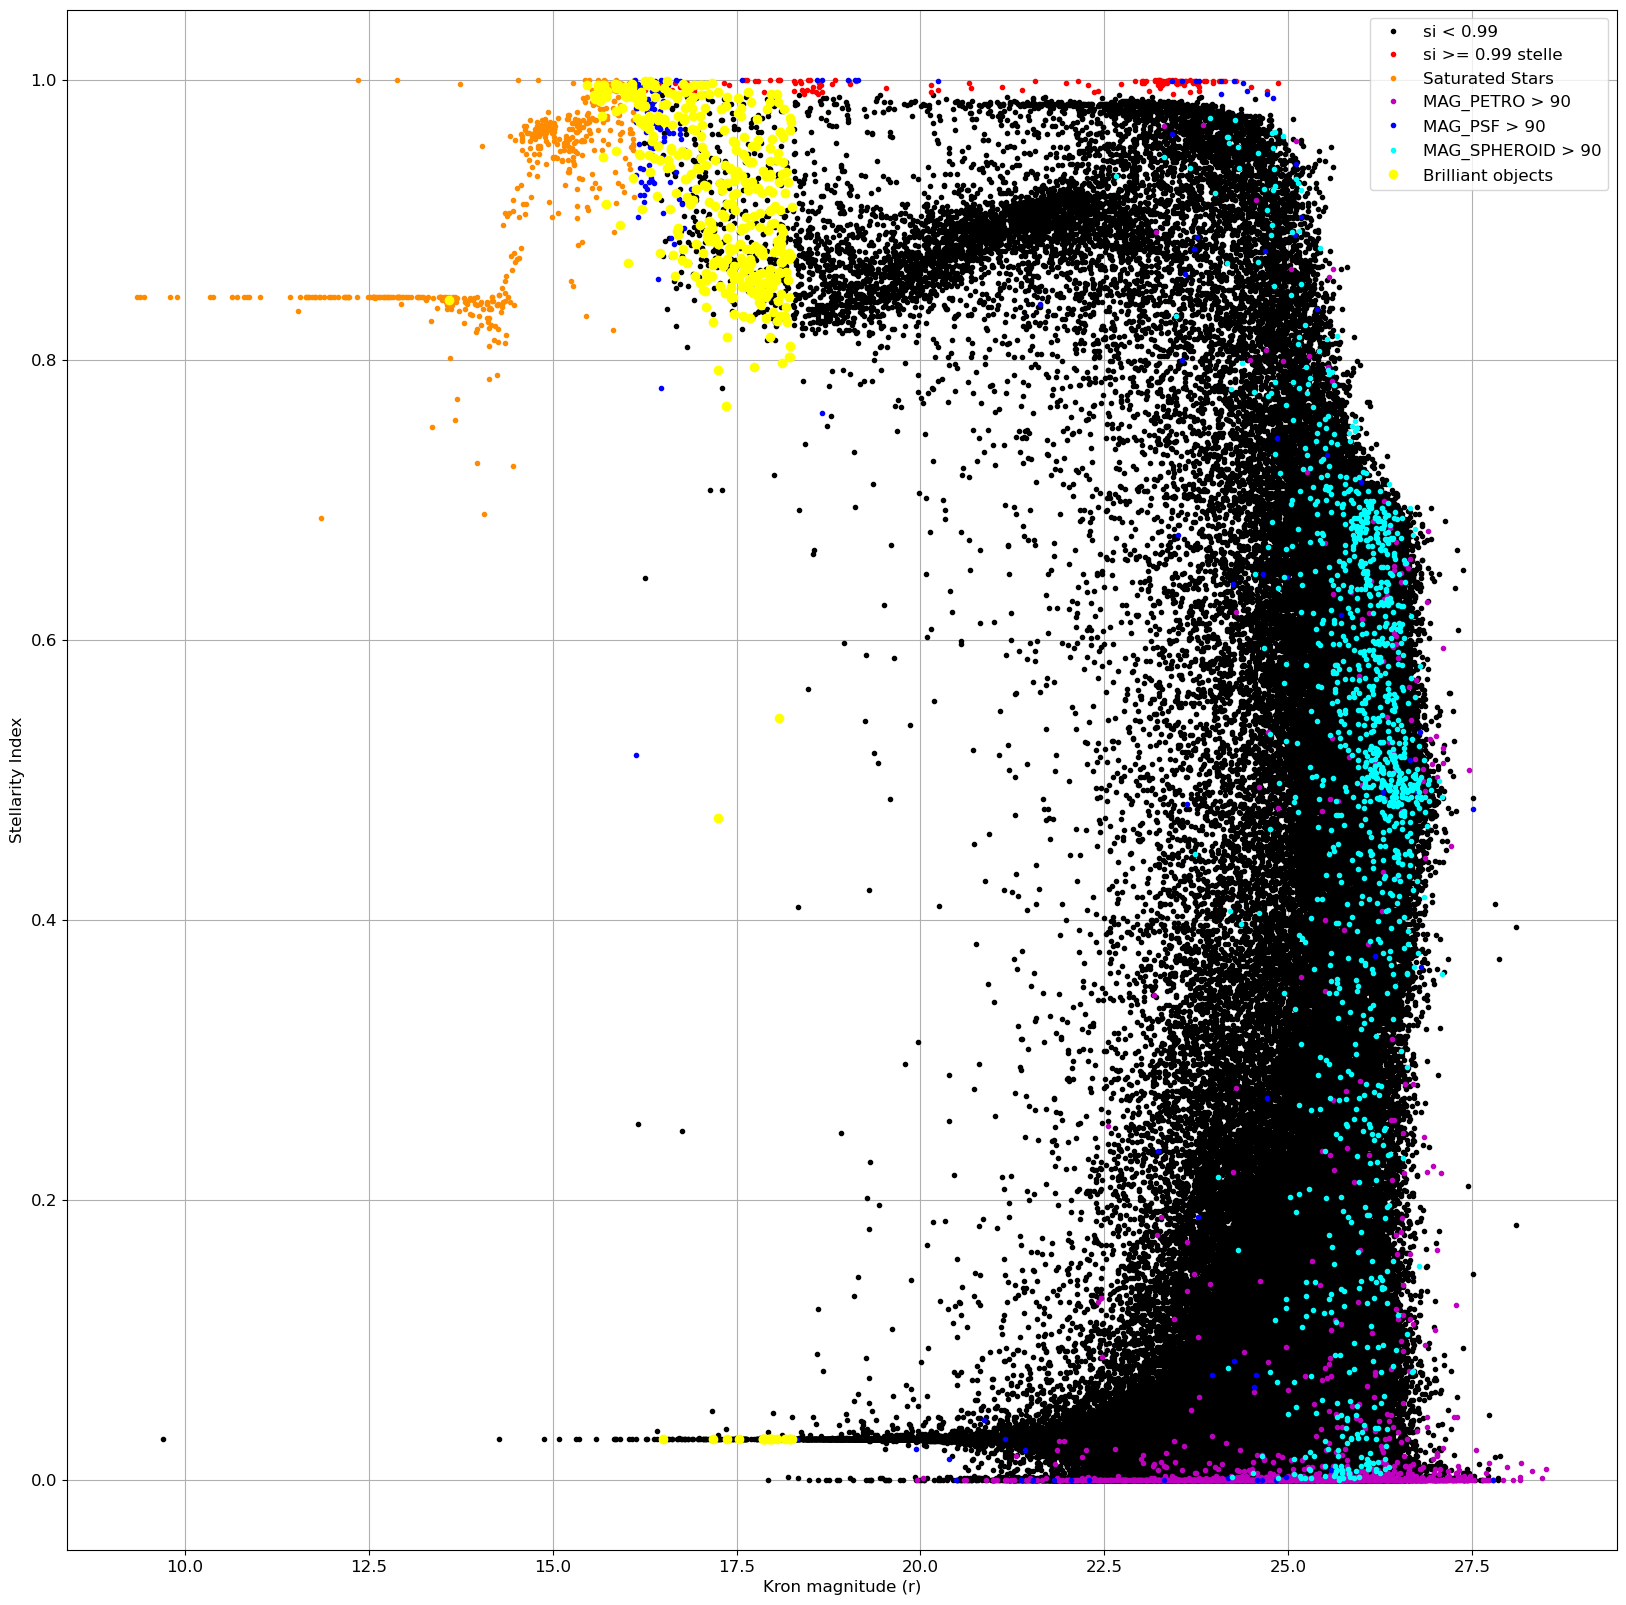

In [8]:
# First plot: Stellarity Index Vs Kron Magnitude
plt.figure(figsize=(20,20))
plt.plot(catalog[:,7][nsflag==0],catalog[:,37][nsflag==0],'.',label='si < 0.99 ',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,37][nsflag==1],'.',label='si >= 0.99 stelle',color='r')
plt.plot(catalog[:,7][nsflag==9],catalog[:,37][nsflag==9],'.',label='Saturated Stars',color='darkorange')
plt.plot(catalog[:,7][nsflag==97],catalog[:,37][nsflag==97],'.',label='MAG_PETRO > 90',color='m')
plt.plot(catalog[:,7][nsflag==95],catalog[:,37][nsflag==95],'.',label='MAG_PSF > 90',color='blue')
plt.plot(catalog[:,7][nsflag==93],catalog[:,37][nsflag==93],'.',label='MAG_SPHEROID > 90',color='cyan')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['CLASS_STAR_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7][lazzyflag==1],spurious[:,37],'o',label='SPURIOUS',color='magenta')
plt.legend()
plt.grid()
plt.ylabel('Stellarity Index')
_=plt.xlabel('Kron magnitude (r)')

In [9]:
# FLUX_RADIUS - NSFLAG = 2 
for i in range(len(nsflag)):    
    if nsflag[i]==0:
        if catalog[i,34]<= 2.8 and catalog[i,7]<=17.809:
            nsflag[i]=2
            nstar += 1          
        elif catalog[i,34]<= 2.8 and catalog[i,7]>17.809 and catalog[i,7]<=20.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.7 and catalog[i,7]>20.809 and catalog[i,7]<=21.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.6 and catalog[i,7]>21.809 and catalog[i,7]<=22.309:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.6 and catalog[i,7]>22.309 and catalog[i,7]<=22.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.5 and catalog[i,7]>22.809 and catalog[i,7]<=23.309:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.4 and catalog[i,7]>23.309 and catalog[i,7]<=23.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.3 and catalog[i,7]>23.809 and catalog[i,7]<=24.309:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.2 and catalog[i,7]>24.309 and catalog[i,7]<=24.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 2.0 and catalog[i,7]>24.809 and catalog[i,7]<=25.309:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 1.8 and catalog[i,7]>25.309 and catalog[i,7]<=25.809:
            nsflag[i]=2
            nstar += 1
        elif catalog[i,34]<= 1.4 and catalog[i,7]>25.809:
            nsflag[i]=2
            nstar += 1

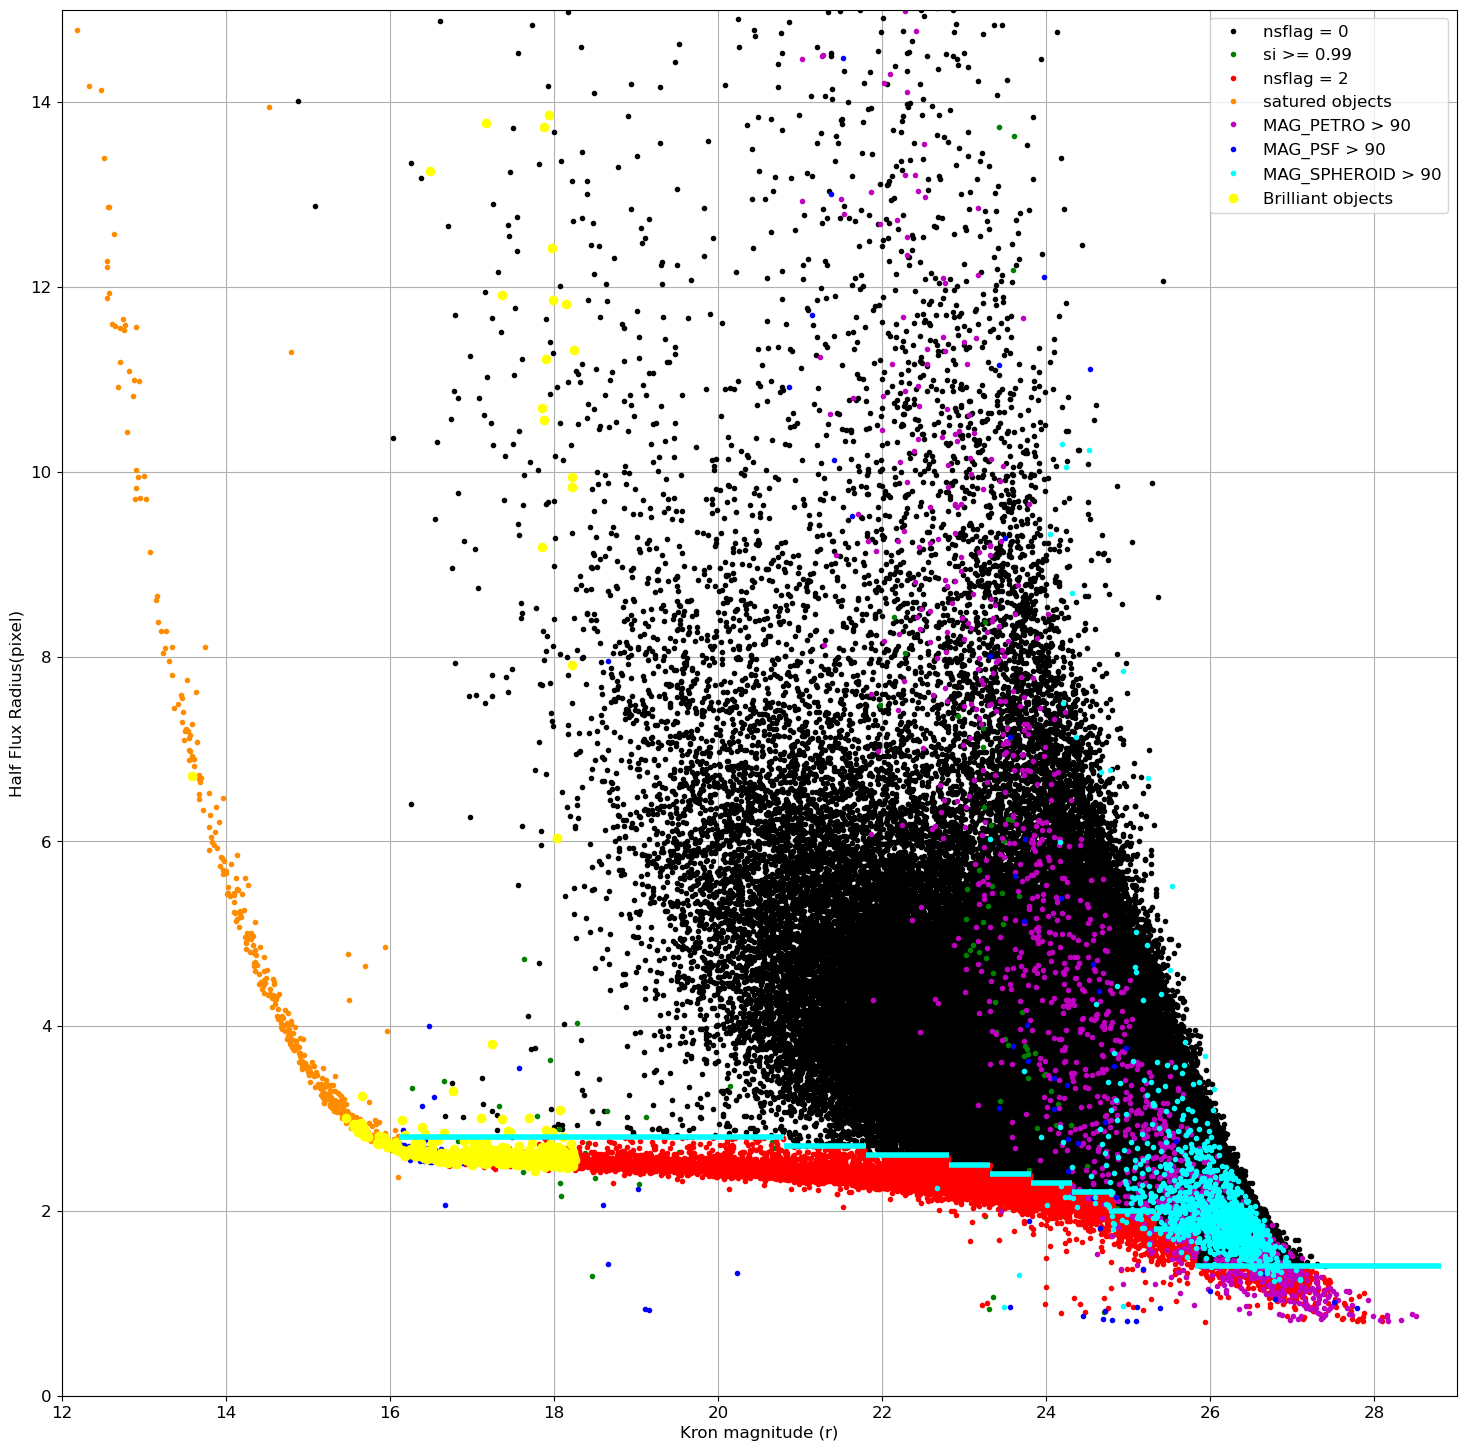

In [10]:
# Second plot: Half Flux Radius Vs Kron Magnitude

plt.figure(figsize=(18,18))

plt.axes(xlim=(10,27.5),ylim=(0,15))
plt.plot(catalog[:,7][nsflag==0],catalog[:,34][nsflag==0],'.',label='nsflag = 0',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,34][nsflag==1],'.',label='si >= 0.99',color='g')
plt.plot(catalog[:,7][nsflag==2],catalog[:,34][nsflag==2],'.',label='nsflag = 2',color='r')
plt.plot(catalog[:,7][nsflag==9],catalog[:,34][nsflag==9],'.',label='satured objects',color='darkorange')
plt.plot(catalog[:,7][nsflag==97],catalog[:,34][nsflag==97],'.',label='MAG_PETRO > 90',color='m')
plt.plot(catalog[:,7][nsflag==95],catalog[:,34][nsflag==95],'.',label='MAG_PSF > 90',color='blue')
plt.plot(catalog[:,7][nsflag==93],catalog[:,34][nsflag==93],'.',label='MAG_SPHEROID > 90',color='cyan')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['FLUX_RADIUS_50_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7],spurious[:,34],'o',label='SPURIOUS',color='magenta')

plt.hlines(2.8,16.109,20.809,lw=4,color='cyan',zorder=5)
plt.hlines(2.7,20.809,21.809,lw=4,color='cyan',zorder=5)
plt.hlines(2.6,21.809,22.809,lw=4,color='cyan',zorder=5)
plt.hlines(2.5,22.809,23.309,lw=4,color='cyan',zorder=5)
plt.hlines(2.4,23.309,23.809,lw=4,color='cyan',zorder=5)
plt.hlines(2.3,23.809,24.309,lw=4,color='cyan',zorder=5)
plt.hlines(2.2,24.309,24.809,lw=4,color='cyan',zorder=5)
plt.hlines(2,24.809,25.309,lw=4,color='cyan',zorder=5)
plt.hlines(1.8,25.309,25.809,lw=4,color='cyan',zorder=5)
plt.hlines(1.4,25.809,28.809,lw=4,color='cyan',zorder=5)

plt.xlim(12,29)
plt.legend()
plt.grid()
plt.xlabel('Kron magnitude (r)')
_=plt.ylabel('Half Flux Radius(pixel)')

In [11]:
# SPREAD_MODEL - NSFLAG = 3
for i in range(len(nsflag)):   
    if nsflag[i]==0:
        if catalog[i,78]<0.002 and catalog[i,7]<=23.309:
            nsflag[i]=3
            nstar += 1
        if catalog[i,78]<0.0015 and catalog[i,7]>23.309 and catalog[i,7]<=23.809:
            nsflag[i]=3
            nstar += 1
        if catalog[i,78]<0.0010 and catalog[i,7]>23.809 and catalog[i,7]<=24.309:
            nsflag[i]=3
            nstar += 1
        if catalog[i,78]<0.0005 and catalog[i,7]>24.309 and catalog[i,7]<=24.809:
            nsflag[i]=3
            nstar += 1
        if catalog[i,78]<-0.0005 and catalog[i,7]>24.809 and catalog[i,7]<=25.309:
            nsflag[i]=3
            nstar += 1
        if catalog[i,78]<-0.0010 and catalog[i,7]>25.309:
            nsflag[i]=3
            nstar += 1

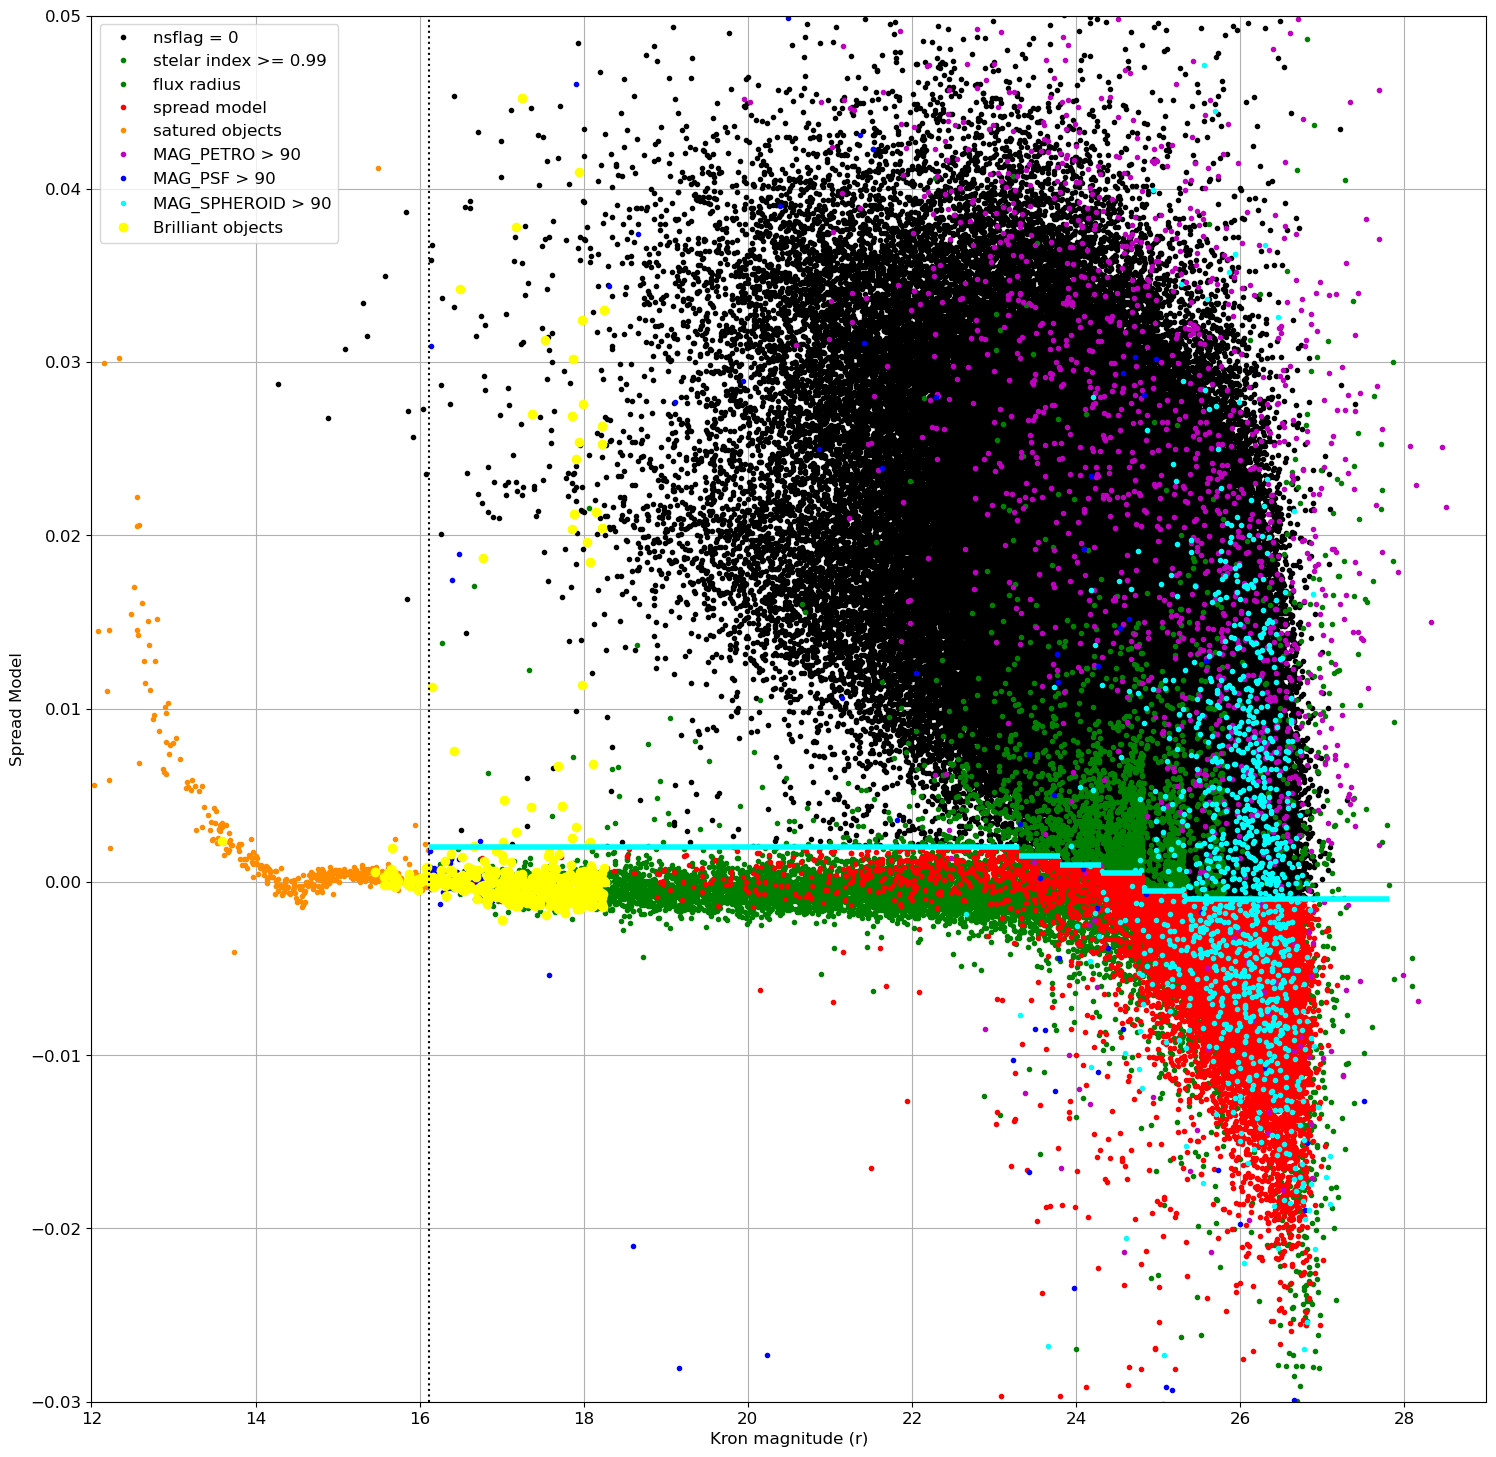

In [12]:
# Third plot: Spread Model Vs Kron Magnitude
plt.figure(figsize=(18,18))
plt.plot(catalog[:,7][nsflag==0],catalog[:,78][nsflag==0],'.',label='nsflag = 0',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,78][nsflag==1],'.',label='stelar index >= 0.99',color='g')
plt.plot(catalog[:,7][nsflag==2],catalog[:,78][nsflag==2],'.',label='flux radius',color='g')
plt.plot(catalog[:,7][nsflag==3],catalog[:,78][nsflag==3],'.',label='spread model',color='r')
plt.plot(catalog[:,7][nsflag==9],catalog[:,78][nsflag==9],'.',label='satured objects',color='darkorange')
plt.plot(catalog[:,7][nsflag==97],catalog[:,78][nsflag==97],'.',label='MAG_PETRO > 90',color='m')
plt.plot(catalog[:,7][nsflag==95],catalog[:,78][nsflag==95],'.',label='MAG_PSF > 90',color='blue')
plt.plot(catalog[:,7][nsflag==93],catalog[:,78][nsflag==93],'.',label='MAG_SPHEROID > 90',color='cyan')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['SPREAD_MODEL_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7],spurious[:,78],'o',label='MAGENTA',color='magenta')


plt.axvline(16.109,ls=':',color='black')
plt.hlines(0.0020,16.109,23.309,lw=4,color='cyan',zorder=5)
plt.hlines(0.0015,23.309,23.809,lw=4,color='cyan',zorder=5)
plt.hlines(0.0010,23.809,24.309,lw=4,color='cyan',zorder=5)
plt.hlines(0.0005,24.309,24.809,lw=4,color='cyan',zorder=5)
plt.hlines(-0.0005,24.809,25.309,lw=4,color='cyan',zorder=5)
plt.hlines(-0.0010,25.309,27.809,lw=4,color='cyan',zorder=5)
plt.xlim(12,29)
plt.ylim(-0.03,0.05)

plt.legend()
plt.grid()
plt.xlabel('Kron magnitude (r)')
_=plt.ylabel('Spread Model')

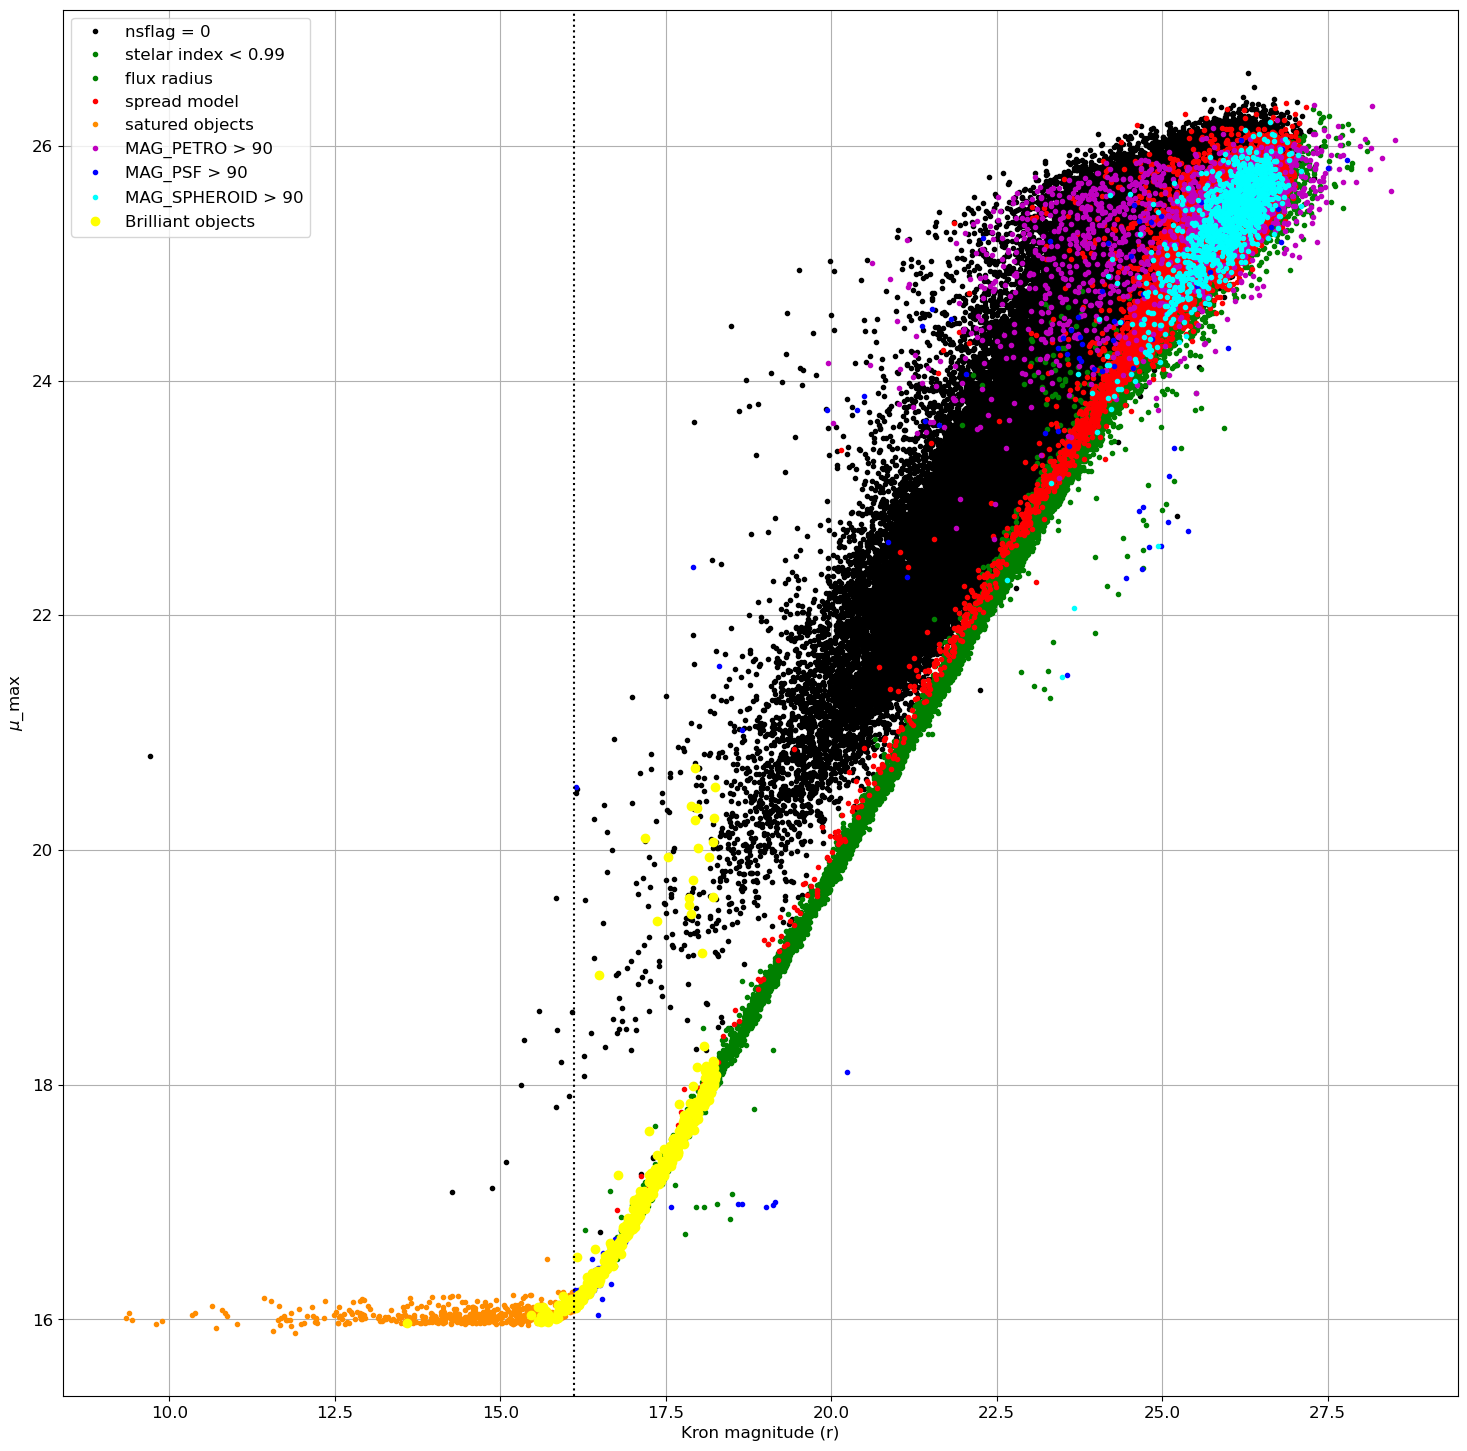

In [13]:
# Fourth plot: Mu Max Vs Kron Magnitude
plt.figure(figsize=(18,18))

plt.plot(catalog[:,7][nsflag==0],catalog[:,10][nsflag==0],'.',label='nsflag = 0',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,10][nsflag==1],'.',label='stelar index < 0.99',color='g')
plt.plot(catalog[:,7][nsflag==2],catalog[:,10][nsflag==2],'.',label='flux radius',color='g')
plt.plot(catalog[:,7][nsflag==3],catalog[:,10][nsflag==3],'.',label='spread model',color='r')
plt.plot(catalog[:,7][nsflag==9],catalog[:,10][nsflag==9],'.',label='satured objects',color='darkorange')
plt.plot(catalog[:,7][nsflag==97],catalog[:,10][nsflag==97],'.',label='MAG_PETRO > 90',color='m')
plt.plot(catalog[:,7][nsflag==95],catalog[:,10][nsflag==95],'.',label='MAG_PSF > 90',color='blue')
plt.plot(catalog[:,7][nsflag==93],catalog[:,10][nsflag==93],'.',label='MAG_SPHEROID > 90',color='cyan')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['MU_MAX_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7],spurious[:,10],'o',label='SPURIOUS',color='magenta')



plt.axvline(16.109,ls=':',color='black')
plt.legend()
plt.grid()
plt.xlabel('Kron magnitude (r)')
_=plt.ylabel('$\mu$_max')

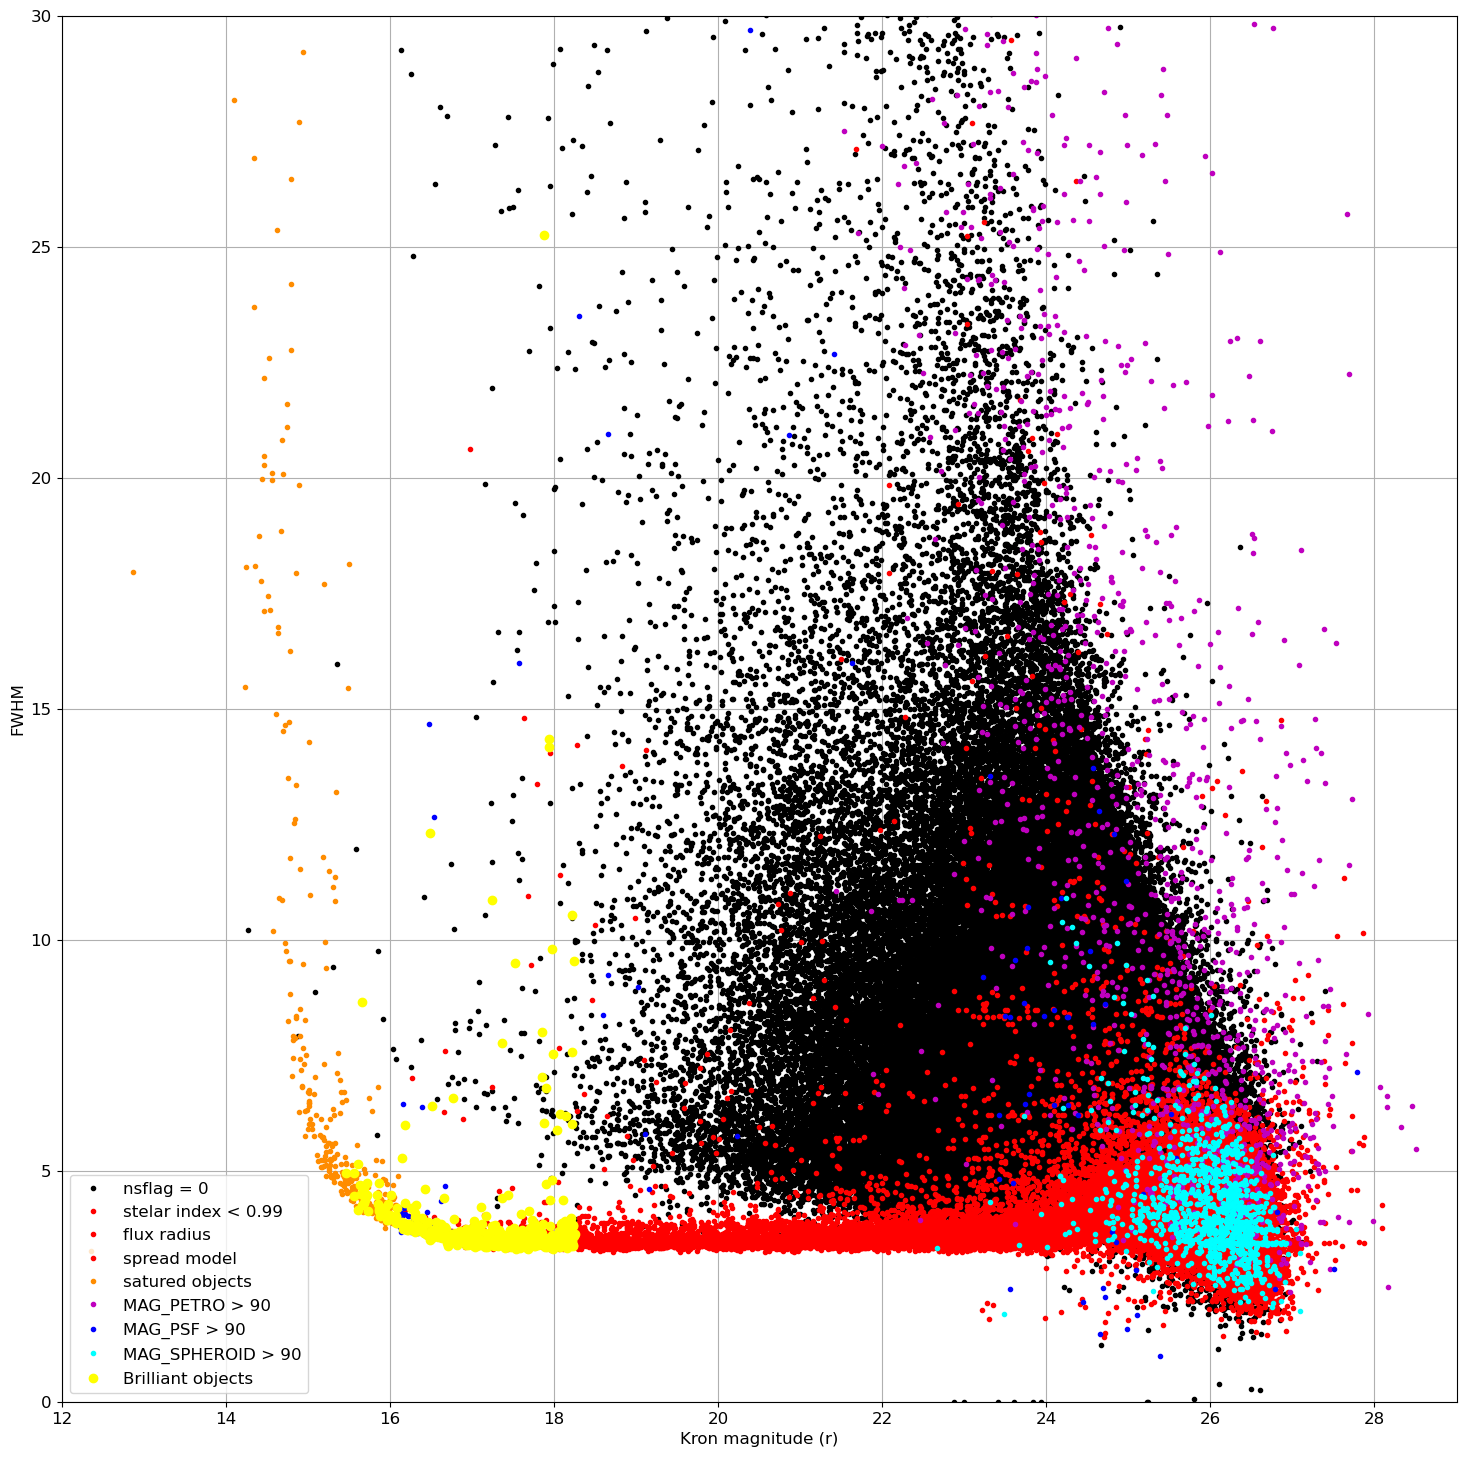

In [14]:
# Fifth plot: FWHM Vs Kron Magnitude
plt.figure(figsize=(18,18))
#plt.axes(xlim=(13,27),ylim=(0,20))

plt.plot(catalog[:,7][nsflag==0],catalog[:,38][nsflag==0],'.',label='nsflag = 0',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,38][nsflag==1],'.',label='stelar index < 0.99',color='r')
plt.plot(catalog[:,7][nsflag==2],catalog[:,38][nsflag==2],'.',label='flux radius',color='r')
plt.plot(catalog[:,7][nsflag==3],catalog[:,38][nsflag==3],'.',label='spread model',color='r')
plt.plot(catalog[:,7][nsflag==9],catalog[:,38][nsflag==9],'.',label='satured objects',color='darkorange')
plt.plot(catalog[:,7][nsflag==97],catalog[:,38][nsflag==97],'.',label='MAG_PETRO > 90',color='m')
plt.plot(catalog[:,7][nsflag==95],catalog[:,38][nsflag==95],'.',label='MAG_PSF > 90',color='blue')
plt.plot(catalog[:,7][nsflag==93],catalog[:,38][nsflag==93],'.',label='MAG_SPHEROID > 90',color='cyan')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['FWHM_IMAGE_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7],spurious[:,38],'o',label='SPURIOUS',color='magenta')
plt.ylim(0,30)
plt.xlim(12,29)

plt.grid() 
plt.legend()
plt.xlabel('Kron magnitude (r)')
_=plt.ylabel('FWHM')

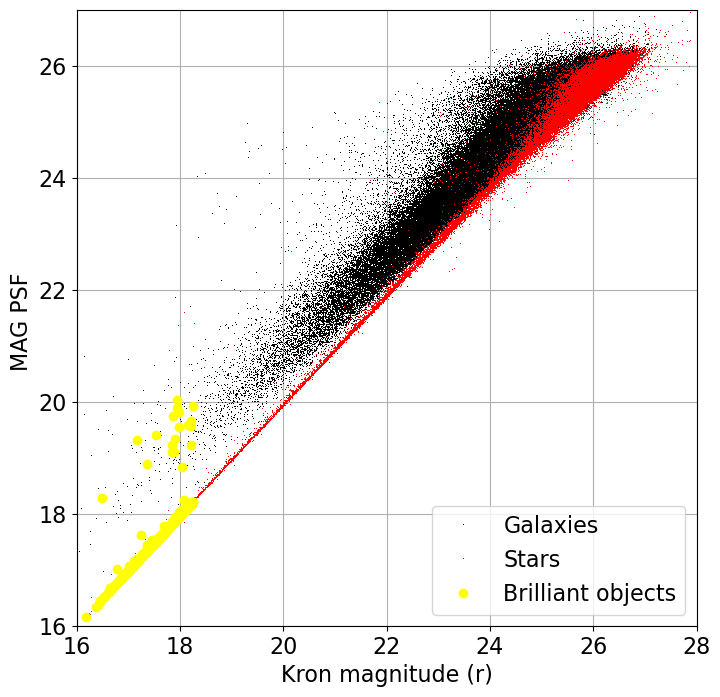

In [15]:
# Sixth plot: PSF Vs Kron Magnitude
rcParams["font.size"] = 16
plt.figure(figsize=(8,8))

plt.plot(catalog[:,7][nsflag==0],catalog[:,64][nsflag==0],',',label='Galaxies',color='k')
plt.plot(catalog[:,7][nsflag==1],catalog[:,64][nsflag==1],',',label='Stars',color='r')
plt.plot(catalog[:,7][nsflag==2],catalog[:,64][nsflag==2],',',label='',color='r')
plt.plot(catalog[:,7][nsflag==3],catalog[:,64][nsflag==3],',',label='',color='r')
plt.plot(df_brilliant['MAG_AUTO_r'],df_brilliant['MAG_PSF_r'],'o',label='Brilliant objects',color='yellow')
#plt.plot(spurious[:,7],spurious[:,64],'o',label='SPURIOUS',color='magenta')


#plt.plot(catalog[:,7][nsflag==9],catalog[:,64][nsflag==9],',',label='satured objects',color='darkorange')
#plt.plot(catalog[:,7][nsflag==97],catalog[:,64][nsflag==97],',',label='MAG_PETRO > 90',color='m')
#plt.plot(catalog[:,7][nsflag==95],catalog[:,64][nsflag==95],',',label='MAG_PSF > 90',color='blue')
#plt.plot(catalog[:,7][nsflag==93],catalog[:,64][nsflag==93],',',label='MAG_SPHEROID > 90',color='cyan')

plt.xlim(16,28)
plt.ylim(16,27)
plt.grid() 
plt.legend()
plt.xlabel('Kron magnitude (r)')
_=plt.ylabel('MAG PSF ')

#plt.savefig('mag_psf_r.jpg')

# Stellar index > 0.9

In [16]:
#stellar = (nsflag==0) | (catalog[:,37]>0.9)
stellar =catalog[:,37][nsflag==0]>0.9


print(stellar.shape,stellar.sum())

(205546,) 811


In [17]:
original_catalog = catalog.copy()


In [18]:
catalog = catalog

# Plot for the paper

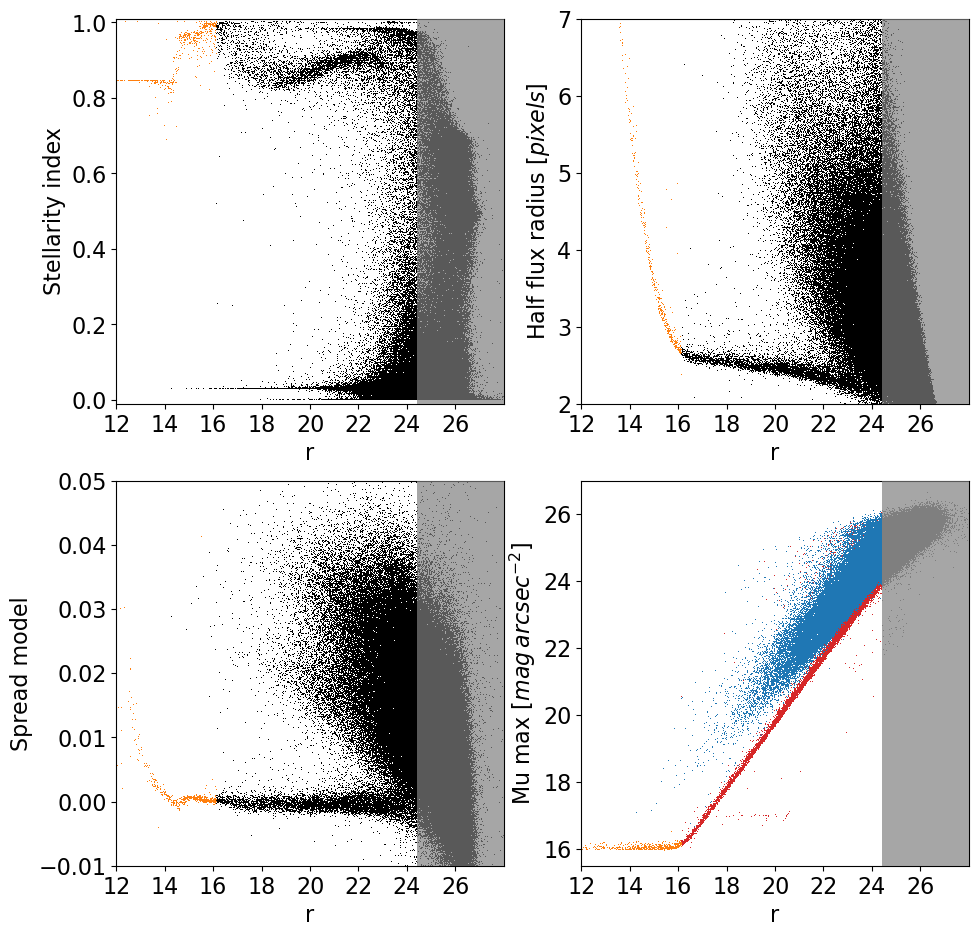

In [21]:
from scipy.stats import gaussian_kde

xmin = 12
xmax = 28
xtick = 2

rcParams["font.size"] = 16
plt.figure(figsize=(11,11))

plt.subplot(221)
plt.plot(catalog[:,7],catalog[:,37],',',label='',color='k')
#plt.plot(catalog[:,7][nsflag!=0],catalog[:,37][nsflag!=0],',',label='',color='#fb8072')
plt.plot(catalog[:,7][nsflag==9],catalog[:,37][nsflag==9],',',label='Saturated stars (Nsflag=9)',color='tab:orange')
#plt.axvspan(24.4,29,color='#ffffb3',alpha=.7,lw=0,zorder=10)
plt.axvspan(24.4,29,color='gray',alpha=.7,lw=0,zorder=10)

plt.xlabel('r')
plt.ylabel('Stellarity index')
plt.xlim(xmin,xmax)
plt.xticks(np.arange(xmin, xmax, xtick))
plt.ylim(-0.01,1.01)
#plt.axvspan(20,29,color='red',zorder=10,alpha=0.6)






plt.subplot(222)
plt.plot(catalog[:,7],catalog[:,34],',',label='',color='k')
#plt.plot(catalog[:,7][nsflag!=0],catalog[:,34][nsflag!=0],',',label='',color='#fb8072')
plt.plot(catalog[:,7][nsflag==9],catalog[:,34][nsflag==9],',',label='Saturated stars (Nsflag=9)',color='tab:orange')

#plt.axvspan(24.4,29,color='#ffffb3',alpha=.7,lw=0,zorder=10)
plt.axvspan(24.4,29,color='gray',alpha=.7,lw=0,zorder=10)
plt.xlabel('r')
plt.ylabel('Half flux radius [$pixels$]')
plt.xlim(xmin,xmax)
plt.xticks(np.arange(xmin, xmax, xtick))
plt.ylim(2,7)
#plt.axvspan(22,29,color='red',zorder=10,alpha=0.6)





plt.subplot(223)
plt.plot(catalog[:,7],catalog[:,78],',',label='',color='k')
#plt.plot(catalog[:,7][nsflag!=0],catalog[:,78][nsflag!=0],',',label='',color='#fb8072')
plt.plot(catalog[:,7][nsflag==9],catalog[:,78][nsflag==9],',',label='Saturated stars (Nsflag=9)',color='tab:orange')

#plt.axvspan(24.4,29,color='#ffffb3',alpha=.5,lw=0,zorder=10)
plt.axvspan(24.4,29,color='gray',alpha=.7,lw=0,zorder=10)
plt.xlabel('r')
plt.ylabel('Spread model')
plt.xlim(xmin,xmax)
plt.xticks(np.arange(xmin, xmax, xtick))
plt.ylim(-0.01,0.05)
#plt.axvspan(24.4,29,color='red',zorder=10,alpha=0.6)






plt.subplot(224)
#plt.axvline(16.109,ls='--',color='#80b1d3')
#plt.plot(catalog[:,7],catalog[:,10],',',label='',color='k')
plt.plot(catalog[:,7][nsflag!=0],catalog[:,10][nsflag!=0],',',label='Stars (Nsflag=1,2,3)',color='tab:red')
plt.plot(catalog[:,7][nsflag==0],catalog[:,10][nsflag==0],',',label='Stars (Nsflag=0)',color='tab:blue')
plt.plot(catalog[:,7][nsflag==9],catalog[:,10][nsflag==9],',',label='Saturated stars (Nsflag=9)',color='tab:orange')
plt.plot(catalog[:,7][catalog[:,7]>24.4],catalog[:,10][catalog[:,7]>24.4],',',label='',color='tab:gray')

#plt.axvspan(24.4,29,color='#ffffb3',alpha=.6,lw=0,zorder=10)
plt.xlabel('r')
plt.ylabel('Mu max [$mag \, arcsec^{-2}$]')
plt.xlim(xmin,xmax)
plt.xticks(np.arange(xmin, xmax, xtick))
plt.ylim(15.5,27)
#plt.axvspan(24.4,29,color='#ffffb3',alpha=.7,lw=0,zorder=10)
plt.axvspan(24.4,29,color='gray',alpha=.7,lw=0,zorder=10)

plt.savefig('Star_galaxy_r_v2.pdf')
#plt.savefig('Star_galaxy_r_v2_zoom.jpg')


In [27]:
### print('satured stars: ',len(catalog[:,7][(catalog[:,7]<24.4)&(nsflag==9)]))
print('galaxies: ',len(catalog[:,7][(catalog[:,7]<24.4)&(nsflag==0)]))
print('stars: ',len(catalog[:,7][(catalog[:,7]<24.4)&(nsflag>0)&(nsflag!=9)]))





galaxies:  75835
stars:  8643


In [28]:
# COUNTING ALL THE OBJECTS CONSIDERED AS GALAXIES (FLAG 0)
ngal = 0
print('Total number of objects:      ',len(nsflag))
for i in range(len(nsflag)):
    if nsflag[i]==0:
        ngal += 1
print('Remaining number of galaxies: ',ngal)


# PRINTING COMPLETE OUTPUT FILE 
num_points, num_params = catalog.shape

"""with open(output,'w') as n:
    for i in range(num_points):
        if nsflag[i]!=8:
            for j in range(num_params):
                print(catalog[i,j],end=" ",file=n)
            print(nsflag[i],file=n)"""


Total number of objects:       237638
Remaining number of galaxies:  205546


'with open(output,\'w\') as n:\n    for i in range(num_points):\n        if nsflag[i]!=8:\n            for j in range(num_params):\n                print(catalog[i,j],end=" ",file=n)\n            print(nsflag[i],file=n)'